# 1.0 Import Library and File

In [1]:
import pandas as pd

In [2]:
multiStudData = pd.read_csv('MultiSelectedFeatures.csv')
multiStudData

,at_risk_multi_encoded,studied_credits,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score,imd_band,highest_education
0,0,60,2,2,27.0,744.0,717.0,68.7,20-30%,A Level or Equivalent
1,0,60,8,1,302.0,4104.0,3802.0,71.6,80-90%,Lower Than A Level
2,0,60,3,2,127.0,1944.0,1817.0,76.0,30-40%,A Level or Equivalent
3,0,60,6,3,31.0,1150.0,1119.0,77.1,60-70%,HE Qualification
4,0,60,3,1,88.0,1896.0,1808.0,69.9,30-40%,Lower Than A Level
...,...,...,...,...,...,...,...,...,...,...
32588,0,30,3,3,0.0,598.0,598.0,0.0,30-40%,HE Qualification
32589,0,30,4,1,0.0,389.0,389.0,0.0,40-50%,Lower Than A Level
32590,1,30,6,2,0.0,283.0,283.0,0.0,60-70%,A Level or Equivalent
32591,2,30,0,1,21.0,112.0,91.0,0.0,0-10%,Lower Than A Level


In [3]:
multiStudData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   at_risk_multi_encoded      32593 non-null  int64  
 1   studied_credits            32593 non-null  int64  
 2   imd_band_encoded           32593 non-null  int64  
 3   highest_education_encoded  32593 non-null  int64  
 4   before_course_click        32593 non-null  float64
 5   sum_click                  32593 non-null  float64
 6   after_course_click         32593 non-null  float64
 7   final_score                32593 non-null  float64
 8   imd_band                   32593 non-null  object 
 9   highest_education          32593 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 2.5+ MB


In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2.0 Data Preparation

Create a copy of stud_data excluding object data types

In [5]:
stud_numeric_data = multiStudData.select_dtypes(exclude=['object']).copy()

In [6]:
stud_numeric_data

,at_risk_multi_encoded,studied_credits,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score
0,0,60,2,2,27.0,744.0,717.0,68.7
1,0,60,8,1,302.0,4104.0,3802.0,71.6
2,0,60,3,2,127.0,1944.0,1817.0,76.0
3,0,60,6,3,31.0,1150.0,1119.0,77.1
4,0,60,3,1,88.0,1896.0,1808.0,69.9
...,...,...,...,...,...,...,...,...
32588,0,30,3,3,0.0,598.0,598.0,0.0
32589,0,30,4,1,0.0,389.0,389.0,0.0
32590,1,30,6,2,0.0,283.0,283.0,0.0
32591,2,30,0,1,21.0,112.0,91.0,0.0


# 3.0 Model Building

In [7]:
X = stud_numeric_data.drop(columns=['at_risk_multi_encoded'])
y = stud_numeric_data['at_risk_multi_encoded']

## 3.1 Split the Data

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.2 Train Model and Make Prediction

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model_multi = GradientBoostingClassifier(random_state=42)
gb_model_multi.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gb_model_multi.predict(X_test_scaled)

## 3.3 Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8159
Confusion Matrix:
[[2970  102    7]
 [ 377  588  423]
 [  57  234 1761]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      3079
           1       0.64      0.42      0.51      1388
           2       0.80      0.86      0.83      2052

    accuracy                           0.82      6519
   macro avg       0.77      0.75      0.75      6519
weighted avg       0.80      0.82      0.80      6519



Plot ROC Curce

In [12]:
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test):
    # Binarize the multi-class labels
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)

    # Compute ROC curve and ROC area for each class
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(lb.classes_)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve (class {0}) (AUC = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multi-Class')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create a DataFrame to display ROC AUC values
    roc_auc_df = pd.DataFrame({'Class': lb.classes_, 'ROC AUC': [roc_auc[i] for i in range(n_classes)]})

    # Display the DataFrame
    print("ROC AUC values for each class:")
    print(roc_auc_df)

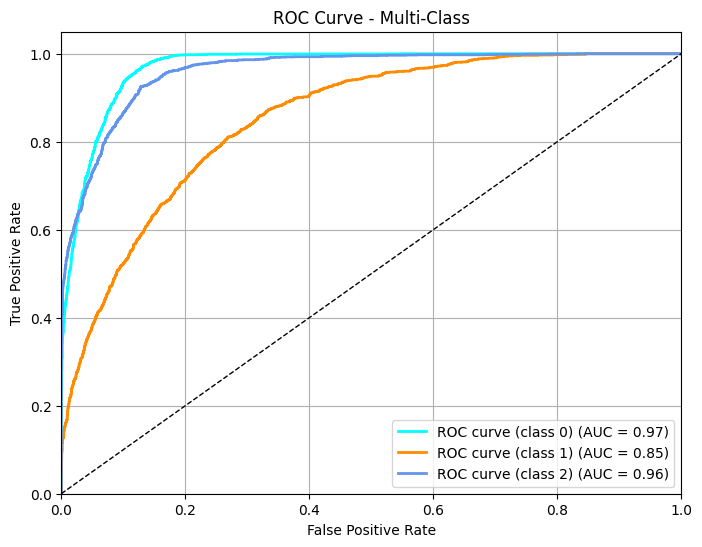

ROC AUC values for each class:
   Class   ROC AUC
0      0  0.969891
1      1  0.851365
2      2  0.959870


In [13]:
plot_roc_curve(gb_model_multi, X_test_scaled, y_test)

Function to check underfitting or overfitting

In [14]:
# Train Accuracy
train_accuracy = gb_model_multi.score(X_train_scaled, y_train)
# Test Accuracy
test_accuracy = gb_model_multi.score(X_test_scaled, y_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy > test_accuracy:
    if (train_accuracy - test_accuracy) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy < test_accuracy:
    if(test_accuracy - train_accuracy) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")

Train Accuracy: 0.8230
Test Accuracy: 0.8159

The model seems to be fitting well.


Plot Learning Curve

In [15]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

# Function to check underfitting or overfitting
def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10)):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', estimator)
    ])
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy', shuffle=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.ylim(0.0, 1.0)  # Set y-axis from 0 to 1
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


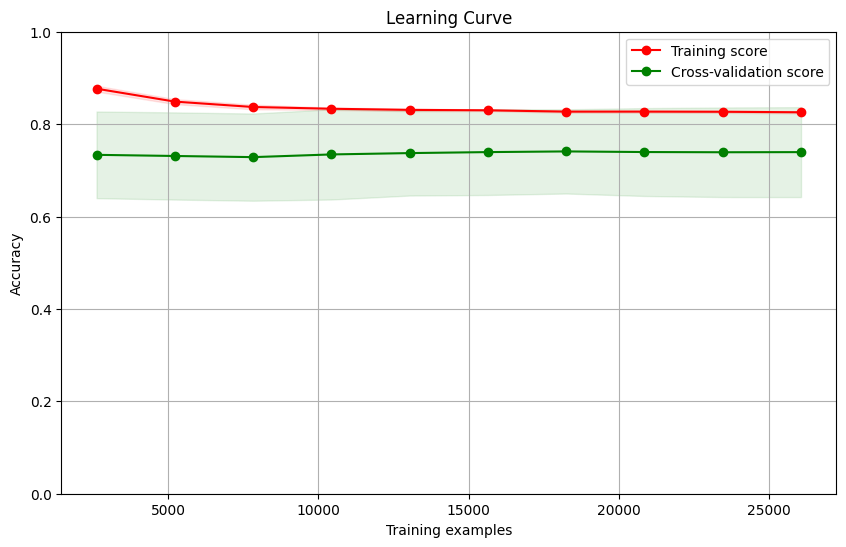

In [16]:
# Plot learning curve
plot_learning_curve(gb_model_multi, X, y)

# 4.0 Hyperparameter Tuning

## 4.1 Parameter

In [17]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## 4.2 Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [19]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation accuracy: 0.8170


## 4.3 Model Evaluation

In [20]:
# Evaluate the best model on the test data
best_gb_model_multi = grid_search.best_estimator_
y_pred_best = best_gb_model_multi.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best Model Test Accuracy: {accuracy_best:.4f}')
print('Best Model Confusion Matrix:')
print(conf_matrix_best)
print('Best Model Classification Report:')
print(class_report_best)

Best Model Test Accuracy: 0.8164
Best Model Confusion Matrix:
[[2974   94   11]
 [ 385  618  385]
 [  61  261 1730]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3079
           1       0.64      0.45      0.52      1388
           2       0.81      0.84      0.83      2052

    accuracy                           0.82      6519
   macro avg       0.77      0.75      0.76      6519
weighted avg       0.80      0.82      0.80      6519



Plot ROC Curce

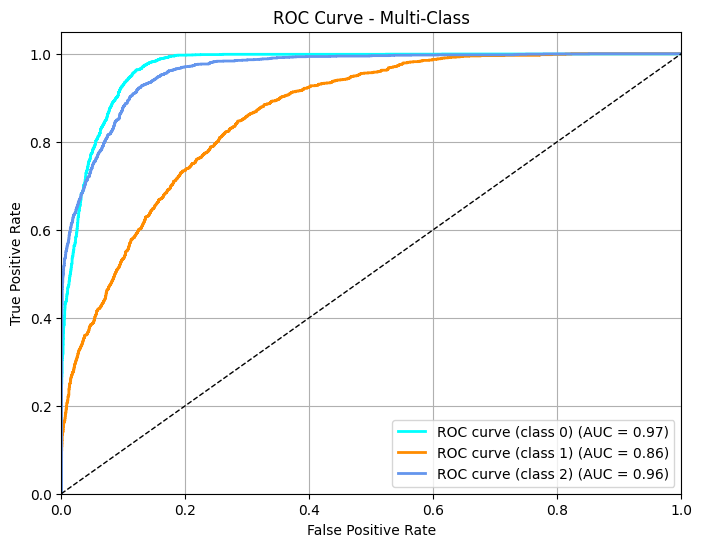

ROC AUC values for each class:
   Class   ROC AUC
0      0  0.969160
1      1  0.862033
2      2  0.961505


In [21]:
# Plot ROC Curve for the best model
plot_roc_curve(best_gb_model_multi, X_test_scaled, y_test)

Function to check underfitting or overfitting

In [22]:
# Train Accuracy
train_accuracy_best = best_gb_model_multi.score(X_train_scaled, y_train)
# Test Accuracy
test_accuracy_best = best_gb_model_multi.score(X_test_scaled, y_test)

print(f'Train Accuracy: {train_accuracy_best:.4f}')
print(f'Test Accuracy: {test_accuracy_best:.4f}')

if train_accuracy_best > test_accuracy_best:
    if (train_accuracy_best - test_accuracy_best) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy_best < test_accuracy_best:
    if(test_accuracy_best - train_accuracy_best) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")

Train Accuracy: 0.8433
Test Accuracy: 0.8164

The model seems to be fitting well.


Plot Learning Curve

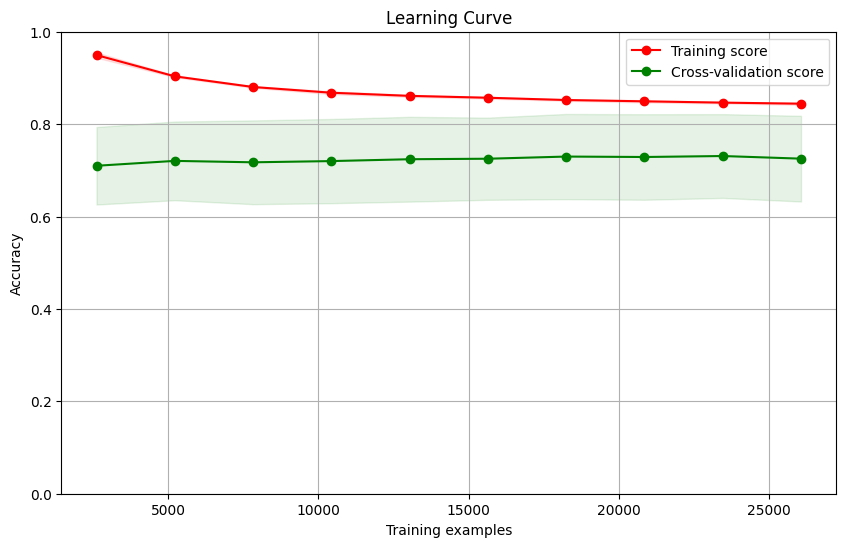

In [23]:
# Plot learning curve for the best model
plot_learning_curve(best_gb_model_multi, X, y)

# 5.0 Feature Importance of Model

In [24]:
def plot_feature_importance(model, feature_names):
    # Extract the feature importances
    feature_importances = model.feature_importances_
    
    # Create a DataFrame for the feature importances
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    
    # Sort the DataFrame by the importance
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='b')
    plt.xlabel('Importance Value')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

    # Display the DataFrame
    print("Feature Importance:")
    display(feat_imp_df[['Feature', 'Importance']])


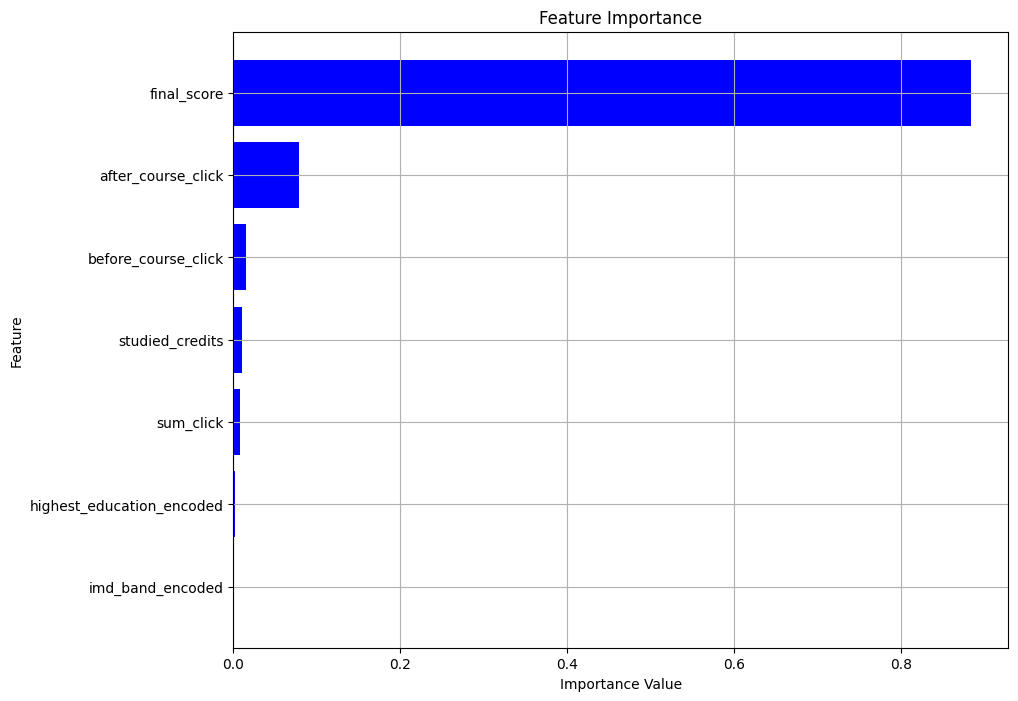

Feature Importance:


,Feature,Importance
6,final_score,0.884439
5,after_course_click,0.078502
3,before_course_click,0.015418
0,studied_credits,0.010237
4,sum_click,0.007942
2,highest_education_encoded,0.002018
1,imd_band_encoded,0.001445


In [25]:
# Plot feature importance
plot_feature_importance(gb_model_multi, X.columns)

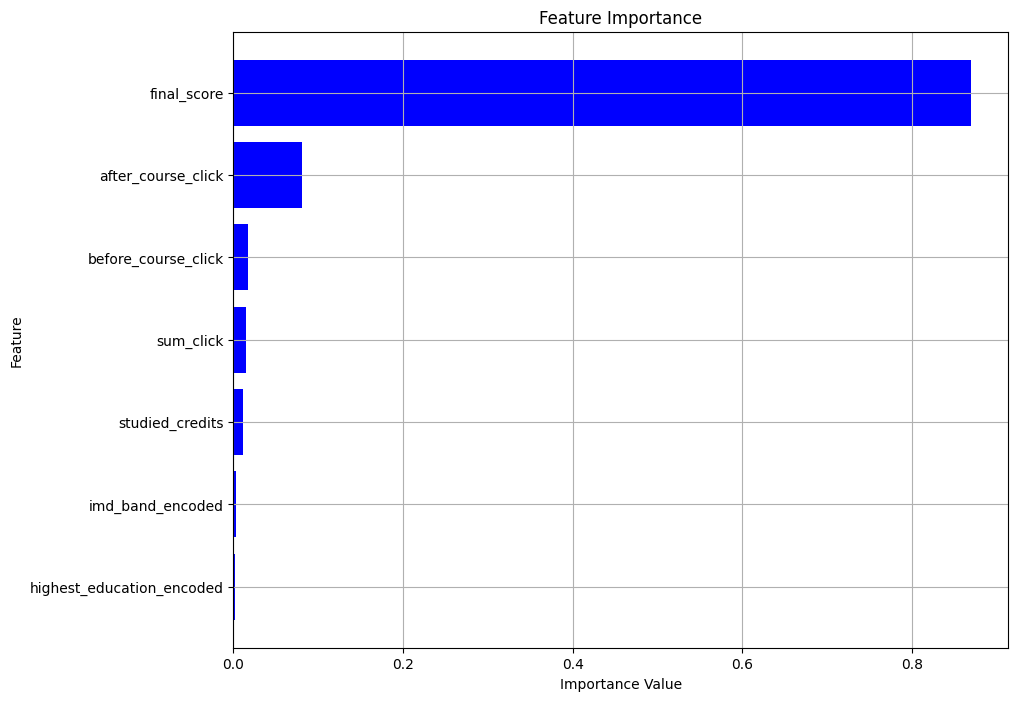

Feature Importance:


,Feature,Importance
6,final_score,0.870066
5,after_course_click,0.081114
3,before_course_click,0.017716
4,sum_click,0.014716
0,studied_credits,0.011243
1,imd_band_encoded,0.002633
2,highest_education_encoded,0.002512


In [26]:
# Plot feature importance
plot_feature_importance(best_gb_model_multi, X.columns)

# Save Model

In [27]:
import joblib
# Save the model
joblib.dump(gb_model_multi, 'Model/Base/gb_model_multi.pkl')

['Model/Base/gb_model_multi.pkl']

In [28]:
import joblib
# Save the model
joblib.dump(best_gb_model_multi, 'Model/Tuned/best_gb_model_multi.pkl')

['Model/Tuned/best_gb_model_multi.pkl']